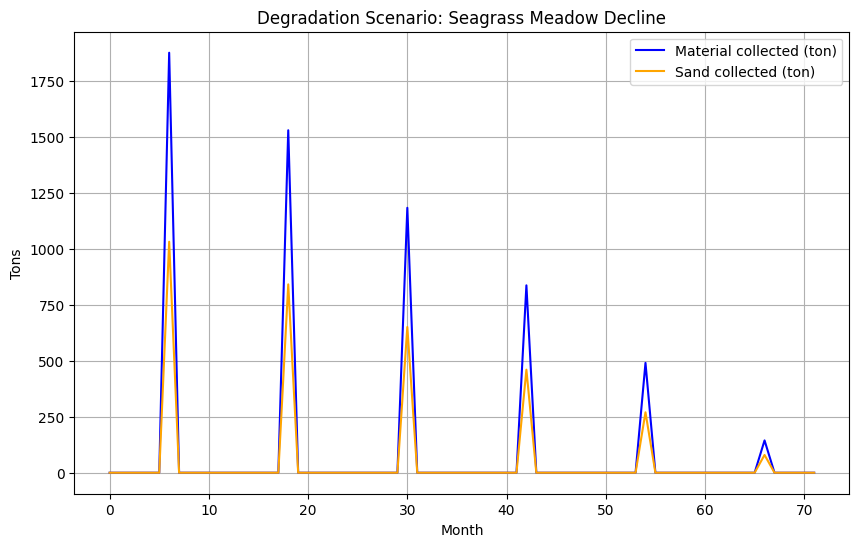

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置总模拟时间（月）和初始面积（km²）
months = 72
initial_area = 14.5  # km²
final_area = 0

# 每 km² 每年收集的物质总量（吨）
collection_efficiency = 141.38  # 每 km² 可收集 wrack+沙子

# 沙子的比例（占比55%）
sand_ratio = 0.55

# 每年收集的月份（一次/年）
collection_months = [6, 18, 30, 42, 54, 66]

# 初始化数组
area = np.linspace(initial_area, final_area, months)
material_collected = np.zeros(months)
sand_collected = np.zeros(months)

# 在每个指定的月份进行收集
for month in collection_months:
    idx = month
    material = area[idx] * collection_efficiency
    material_collected[idx] = material
    sand_collected[idx] = material * sand_ratio

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(material_collected, label='Material collected (ton)', color='blue')
plt.plot(sand_collected, label='Sand collected (ton)', color='orange')
plt.xlabel('Month')
plt.ylabel('Tons')
plt.title('Degradation Scenario: Seagrass Meadow Decline')
plt.legend()
plt.grid(True)
plt.show()


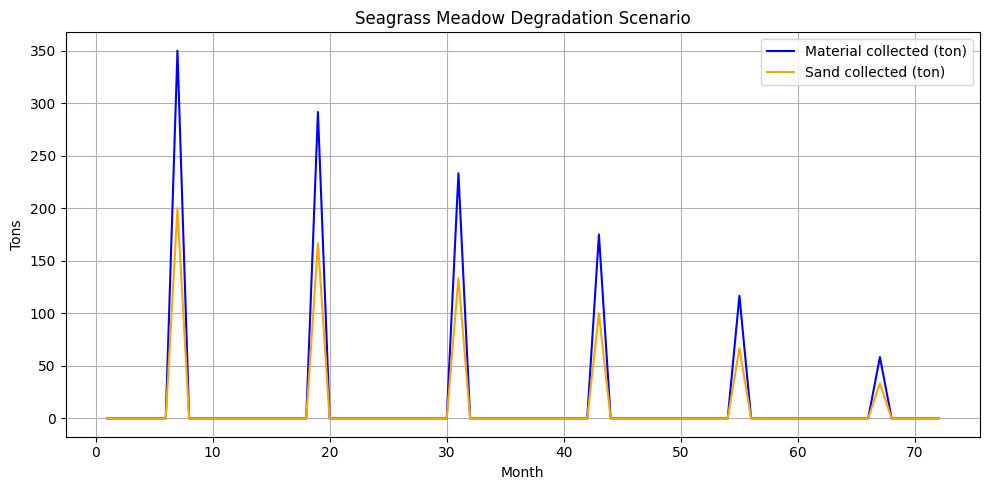

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟时间（72个月）
months = np.arange(1, 73)

# 初始化变量
material_collected = np.zeros(72)
sand_collected = np.zeros(72)

# 设置每年的收集月份（6, 18, 30, 42, 54, 66）
collection_months = [6, 18, 30, 42, 54, 66]

# 设置起始值和线性下降幅度（根据图中观察，蓝线约350起步，橙线约200）
initial_material = 350  # 蓝线 Material collected
initial_sand = 200      # 橙线 Sand collected
degradation_rate_material = initial_material / len(collection_months)
degradation_rate_sand = initial_sand / len(collection_months)

# 填入每年的收集量（每年下降）
for i, month in enumerate(collection_months):
    material_collected[month] = initial_material - i * degradation_rate_material
    sand_collected[month] = initial_sand - i * degradation_rate_sand

# 绘图
plt.figure(figsize=(10, 5))
plt.plot(months, material_collected, label='Material collected (ton)', color='blue')
plt.plot(months, sand_collected, label='Sand collected (ton)', color='orange')
plt.xlabel('Month')
plt.ylabel('Tons')
plt.title('Seagrass Meadow Degradation Scenario')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


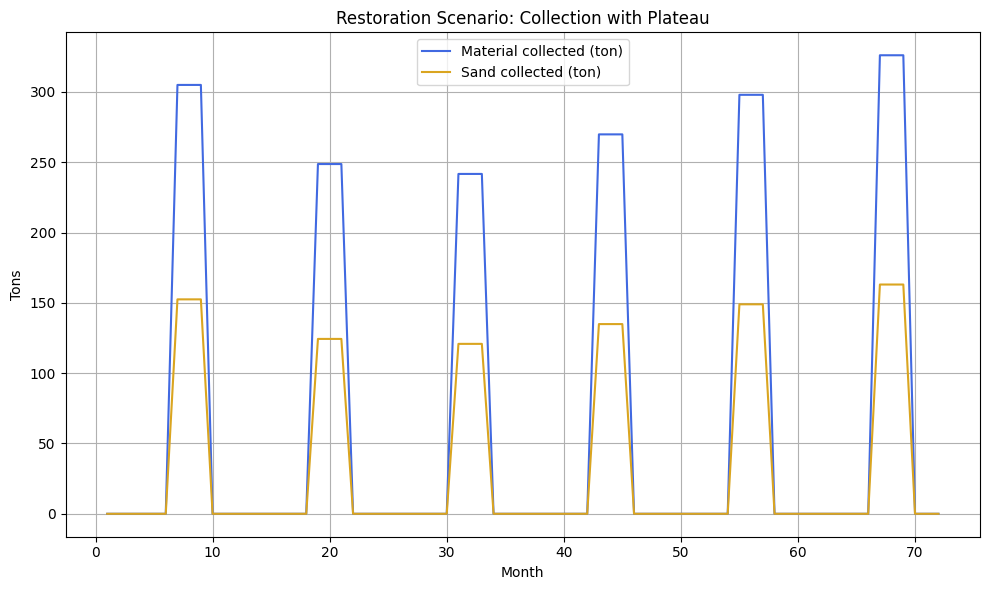

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 时间轴：72个月（6年，每月为一个时间步）
months = np.arange(1, 73)

# 参数设定
initial_area = 14.5           # 初始海草草甸面积 (km²)
degraded_area = 9.67          # 恢复开始时（第24个月）的面积
start_restoration = 24        # 第24个月开始恢复
restoration_duration = 48     # 恢复计划持续48个月
degradation_rate = (initial_area - degraded_area) / start_restoration  # 线性退化速率

#  模拟每月海草面积
seagrass_area = []
for t in months:
    if t <= start_restoration:
        area = initial_area - degradation_rate * t
    else:
        restored = degraded_area + (t - start_restoration) * (initial_area - degraded_area) / restoration_duration
        area = min(initial_area, restored)
    seagrass_area.append(area)

# 收集参数设定
material_per_km2 = 23.3       # 每 km² 可收集的材料（吨）
sand_ratio = 0.5              # 沙子占材料的一半
collection_months = [6, 18, 30, 42, 54, 66]  # 收集月份
collection_duration = 3       # 每次收集持续3个月，形成顶部平坦

# 初始化收集记录（72个月）
material_collected = np.zeros(72)
sand_collected = np.zeros(72)

# 设置每次收集：持续3个月保持同一值
for m in collection_months:
    if m < len(seagrass_area):
        collected_value = seagrass_area[m] * material_per_km2
        for d in range(collection_duration):
            if (m + d) < len(material_collected):
                material_collected[m + d] = collected_value
                sand_collected[m + d] = collected_value * sand_ratio

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(months, material_collected, label="Material collected (ton)", color='royalblue')
plt.plot(months, sand_collected, label="Sand collected (ton)", color='goldenrod')
plt.xlabel("Month")
plt.ylabel("Tons")
plt.title("Restoration Scenario: Collection with Plateau")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

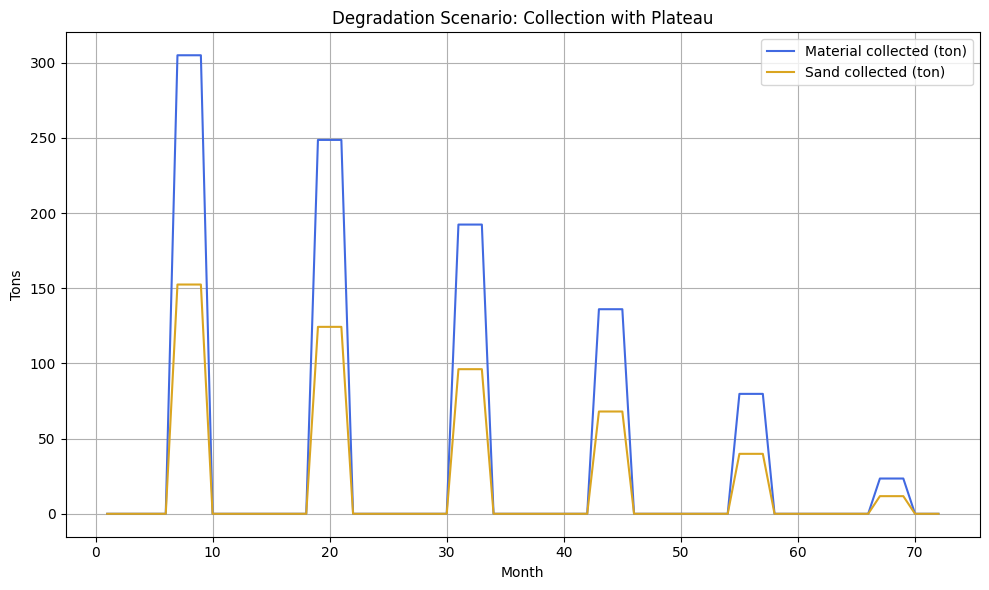

In [4]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 73)

# 参数
initial_area = 14.5            # 初始海草草田面积 (km²)
degradation_duration = 72     # 全过程退化

degradation_rate = initial_area / degradation_duration  # 退化速率：每月减少多少 km²

# 每月面积
seagrass_area = []
for t in months:
    area = max(0, initial_area - degradation_rate * t)
    seagrass_area.append(area)

# 收集参数
material_per_km2 = 23.3       # 每 km^2 可收集的材料 (ton)
sand_ratio = 0.5              # 沙子占比
collection_months = [6, 18, 30, 42, 54, 66]  # 收集时间
collection_duration = 3       # 持续3个月，形成平顶

# 初始化
material_collected = np.zeros(72)
sand_collected = np.zeros(72)

# 收集量
for m in collection_months:
    if m < len(seagrass_area):
        collected_value = seagrass_area[m] * material_per_km2
        for d in range(collection_duration):
            if (m + d) < len(material_collected):
                material_collected[m + d] = collected_value
                sand_collected[m + d] = collected_value * sand_ratio

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(months, material_collected, label="Material collected (ton)", color='royalblue')
plt.plot(months, sand_collected, label="Sand collected (ton)", color='goldenrod')
plt.xlabel("Month")
plt.ylabel("Tons")
plt.title("Degradation Scenario: Collection with Plateau")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 73)

# 参数
initial_area = 14.5            # 初始海草草田面积 (km²)
degradation_duration = 72     # 全过程退化

degradation_rate = initial_area / degradation_duration  # 退化速率：每月减少多少 km²

# 每月面积
seagrass_area = []
for t in months:
    area = max(0, initial_area - degradation_rate * t)
    seagrass_area.append(area)

# 收集参数
material_per_km2 = 23.3       # 每 km^2 可收集的材料 (ton)
sand_ratio = 0.5              # 沙子占比
collection_months = [6, 18, 30, 42, 54, 66]  # 收集时间
collection_duration = 3       # 持续3个月，形成平顶

# 初始化
material_collected = np.zeros(72)
sand_collected = np.zeros(72)

# 收集量
for m in collection_months:
    if m < len(seagrass_area):
        collected_value = seagrass_area[m] * material_per_km2
        for d in range(collection_duration):
            if (m + d) < len(material_collected):
                material_collected[m + d] = collected_value
                sand_collected[m + d] = collected_value * sand_ratio

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(months, material_collected, label="Material collected (ton)", color='royalblue')
plt.plot(months, sand_collected, label="Sand collected (ton)", color='goldenrod')
plt.xlabel("Month")
plt.ylabel("Tons")
plt.title("Degradation Scenario: Collection with Plateau")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()